In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
n_sensors = 5
#n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = np.hstack((x_csv[:, 0], x_csv[:, 3], x_csv[:, 6], x_csv[:, 9], x_csv[:, 12]))

In [7]:
x_5degree.shape

(2190,)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 5, 1)


In [18]:
print(x_test.shape)

(44, 5, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 5)                 0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               3072      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 2s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1022
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.1008
Epoch 6/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0978
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0922
Epoch 8/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0874
Epoch 9/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0854
Epoch 10/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0847
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0814
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0813
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0813
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0813
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0813
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 92/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 93/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0781
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0772
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0771
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0771
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0770
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0770
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0772
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 497/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0747
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0747
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0747
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 503/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0737
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0737
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0739
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0737
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0739
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0728
Epoch 660/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 661/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0729
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0729
Epoch 663/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 664/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0727
Epoch 665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0727
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0727
Epoch 668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0718
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0718
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0718
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0719
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0722
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0721
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 831/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0701
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0697
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0701
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0696
Epoch 911/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0705
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0696
Epoch 914/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0695
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 992/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 994/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 995/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0680
Epoch 1070/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0679
Epoch 1071/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0680
Epoch 1072/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 1073/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0688
Epoch 1074/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 1075/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0681
Epoch 1076/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0680
Epoch 1077/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0678
Epoch 1078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 1079/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0670
Epoch 1152/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0671
Epoch 1153/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0673
Epoch 1154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 1155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 1156/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0678
Epoch 1157/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0678
Epoch 1158/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 1159/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 1160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 1161/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 1234/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0665
Epoch 1235/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0663
Epoch 1236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0664
Epoch 1237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 1238/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 1239/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 1240/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 1241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0665
Epoch 1242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 1243/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 1316/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 1317/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 1318/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 1319/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 1320/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0656
Epoch 1321/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 1322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 1323/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0657
Epoch 1324/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0655
Epoch 1325/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 1398/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1399/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1400/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1401/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 1402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1403/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1404/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1405/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0649
Epoch 1406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0648
Epoch 1407/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 1480/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 1481/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 1482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 1483/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 1484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 1485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 1486/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 1487/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0649
Epoch 1488/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 1489/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0636
Epoch 1562/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0636
Epoch 1563/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0634
Epoch 1564/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 1565/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0636
Epoch 1566/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 1567/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0636
Epoch 1568/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0636
Epoch 1569/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0638
Epoch 1570/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0639
Epoch 1571/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0633
Epoch 1644/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0630
Epoch 1645/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0633
Epoch 1646/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0630
Epoch 1647/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0635
Epoch 1648/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0633
Epoch 1649/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0631
Epoch 1650/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0628
Epoch 1651/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0630
Epoch 1652/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 1653/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 1726/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 1727/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0625
Epoch 1728/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0626
Epoch 1729/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0623
Epoch 1730/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0626
Epoch 1731/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0630
Epoch 1732/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0628
Epoch 1733/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0632
Epoch 1734/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0640
Epoch 1735/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0616
Epoch 1808/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 1809/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 1810/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 1811/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 1812/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 1813/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 1814/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0622
Epoch 1815/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 1816/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 1817/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 1890/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 1891/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 1892/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 1893/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 1895/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0615
Epoch 1897/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0616
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0623
Epoch 1899/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0605
Epoch 1973/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0606
Epoch 1975/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0611
Epoch 1980/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 1981/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0606
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0603
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 2059/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 2060/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 2061/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0599
Epoch 2062/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0606
Epoch 2063/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0597
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 2137/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 2138/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 2139/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0591
Epoch 2140/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0593
Epoch 2141/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0594
Epoch 2142/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0592
Epoch 2143/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 2144/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 2145/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0590
Epoch 2218/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 2219/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0590
Epoch 2220/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0592
Epoch 2221/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0588
Epoch 2222/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0591
Epoch 2223/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0590
Epoch 2224/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0594
Epoch 2225/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 2226/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0595
Epoch 2227/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0588
Epoch 2300/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 2301/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0586
Epoch 2302/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0585
Epoch 2303/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0581
Epoch 2304/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0581
Epoch 2305/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 2306/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0583
Epoch 2307/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 2308/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0582
Epoch 2309/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0582
Epoch 2382/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 2383/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0578
Epoch 2384/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 2385/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 2386/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0577
Epoch 2387/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0579
Epoch 2388/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0577
Epoch 2391/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2464/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2465/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2466/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0576
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0573
Epoch 2473/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0573
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 2551/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2552/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 2553/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 2554/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 2555/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 2628/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 2629/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0558
Epoch 2630/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0557
Epoch 2631/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 2632/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 2633/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 2634/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0563
Epoch 2635/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 2636/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 2637/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0553
Epoch 2710/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0550
Epoch 2711/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0555
Epoch 2712/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0554
Epoch 2713/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0558
Epoch 2714/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 2715/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0552
Epoch 2716/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0553
Epoch 2717/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0552
Epoch 2718/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0551
Epoch 2719/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0549
Epoch 2792/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 2793/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 2794/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 2795/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 2796/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0551
Epoch 2797/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0553
Epoch 2798/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0551
Epoch 2799/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 2800/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 2801/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0553
Epoch 2874/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 2875/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 2876/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 2877/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0549
Epoch 2878/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0549
Epoch 2879/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 2880/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 2881/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 2882/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 2883/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0542
Epoch 2956/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 2957/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 2958/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 2959/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 2960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0538
Epoch 2961/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 2962/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0540
Epoch 2963/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0542
Epoch 2964/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0540
Epoch 2965/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 3038/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 3039/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0539
Epoch 3040/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0535
Epoch 3041/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 3042/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 3043/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0532
Epoch 3044/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0532
Epoch 3045/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0534
Epoch 3046/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 3047/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0534
Epoch 3120/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0538
Epoch 3121/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0534
Epoch 3122/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 3123/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 3124/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0527
Epoch 3125/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 3126/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0528
Epoch 3127/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0530
Epoch 3128/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0531
Epoch 3129/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0528
Epoch 3202/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0529
Epoch 3203/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0525
Epoch 3204/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 3206/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 3207/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 3208/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 3209/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 3210/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0522
Epoch 3211/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 3284/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 3285/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 3286/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 3287/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3288/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 3289/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 3290/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 3291/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 3292/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 3293/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 3366/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3367/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3368/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 3369/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3370/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 3371/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0514
Epoch 3372/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3373/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 3374/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0514
Epoch 3375/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0510
Epoch 3448/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 3449/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 3450/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0511
Epoch 3451/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 3452/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0517
Epoch 3453/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0514
Epoch 3457/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0512
Epoch 3530/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0512
Epoch 3531/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3532/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0512
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0516
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0511
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0511
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0507
Epoch 3539/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0501
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0502
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0503
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0503
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0502
Epoch 3620/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0501
Epoch 3621/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0501
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 3702/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 3703/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 3777/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0491
Epoch 3778/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 3779/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 3780/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 3781/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3782/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0503
Epoch 3783/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 3784/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0494
Epoch 3785/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0490
Epoch 3858/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 3859/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 3860/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 3861/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 3862/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0491
Epoch 3863/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0489
Epoch 3864/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0491
Epoch 3865/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 3866/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 3867/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 3940/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0483
Epoch 3941/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0488
Epoch 3942/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0494
Epoch 3943/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0485
Epoch 3944/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 3945/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 3946/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0485
Epoch 3947/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 3948/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 3949/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0483
Epoch 4022/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 4023/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0483
Epoch 4024/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 4025/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 4026/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 4027/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0478
Epoch 4028/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 4029/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 4030/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 4031/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 4104/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 4105/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 4106/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 4107/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0478
Epoch 4108/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 4109/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0479
Epoch 4110/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 4111/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 4112/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 4113/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 4186/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 4187/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 4188/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 4189/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0470
Epoch 4190/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 4191/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0472
Epoch 4192/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 4193/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 4194/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 4195/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4268/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 4269/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 4270/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 4271/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 4272/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0471
Epoch 4273/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 4274/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 4275/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 4276/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4277/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4350/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 4351/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0470
Epoch 4352/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 4353/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 4354/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 4355/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0461
Epoch 4356/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 4357/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 4358/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4359/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 4432/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 4433/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 4434/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4435/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4436/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0469
Epoch 4437/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 4438/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 4439/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0461
Epoch 4440/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0460
Epoch 4441/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 4514/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 4515/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4516/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 4517/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4518/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 4519/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4520/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0458
Epoch 4521/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 4522/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 4523/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0453
Epoch 4596/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0453
Epoch 4597/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4598/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4599/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 4600/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 4601/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 4602/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4603/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0459
Epoch 4604/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0458
Epoch 4605/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 4678/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 4679/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 4680/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4681/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0453
Epoch 4682/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4683/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 4684/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0456
Epoch 4685/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0451
Epoch 4686/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 4687/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0448
Epoch 4760/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0450
Epoch 4761/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 4762/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0449
Epoch 4763/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 4764/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0442
Epoch 4765/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 4766/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 4767/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 4768/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 4769/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 4842/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0450
Epoch 4843/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 4844/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 4845/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0451
Epoch 4846/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 4847/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 4848/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 4849/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 4850/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 4851/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0441
Epoch 4924/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 4925/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 4926/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0436
Epoch 4927/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0438
Epoch 4928/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 4929/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0441
Epoch 4930/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 4931/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0436
Epoch 4932/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 4933/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 5006/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 5007/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 5008/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 5009/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 5010/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 5011/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0438
Epoch 5012/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0442
Epoch 5013/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 5014/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0440
Epoch 5015/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 5088/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 5089/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 5090/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 5091/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 5092/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 5093/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 5094/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 5095/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 5096/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 5097/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 5170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0442
Epoch 5171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0439
Epoch 5172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 5173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 5174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 5175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0427
Epoch 5176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5177/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5178/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5179/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 5254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0426
Epoch 5257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 5259/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 5260/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5261/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 5334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 5335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0418
Epoch 5336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 5337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 5338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 5339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 5340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 5341/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 5342/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 5343/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 5417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 5418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0420
Epoch 5419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0426
Epoch 5420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0420
Epoch 5421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 5422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 5423/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 5424/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0422
Epoch 5425/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0413
Epoch 5498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0414
Epoch 5499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 5500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 5501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 5502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 5503/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0413
Epoch 5504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0418
Epoch 5505/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0418
Epoch 5506/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0418
Epoch 5507/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0415
Epoch 5580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0410
Epoch 5583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 5584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0411
Epoch 5586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5587/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0410
Epoch 5588/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 5589/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 5662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 5663/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 5664/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0410
Epoch 5665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 5666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 5669/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 5670/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0414
Epoch 5671/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 5744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 5745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 5746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 5747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 5748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 5749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 5750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 5751/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 5752/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 5753/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 5826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 5827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 5828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 5829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 5830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 5831/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 5832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 5833/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 5834/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 5835/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 5908/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 5909/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0401
Epoch 5910/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 5911/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 5912/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 5913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 5914/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 5915/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 5916/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0402
Epoch 5917/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 5990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0399
Epoch 5991/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 5992/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 5993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 5994/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 5995/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0399
Epoch 5996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 5997/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 5998/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 5999/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6072/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 6073/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 6074/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 6075/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 6076/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6077/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0391
Epoch 6079/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0388
Epoch 6080/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 6081/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 6154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 6155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 6156/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 6157/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0386
Epoch 6158/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 6159/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 6160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6161/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 6162/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 6163/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0386
Epoch 6236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 6237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0388
Epoch 6238/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 6239/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 6240/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0391
Epoch 6241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 6243/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 6244/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 6245/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 6318/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0385
Epoch 6319/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0382
Epoch 6320/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 6321/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 6322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 6323/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0383
Epoch 6324/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 6325/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 6326/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 6327/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 6400/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 6401/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 6402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 6403/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 6404/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 6405/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 6406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0386
Epoch 6407/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0383
Epoch 6408/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0383
Epoch 6409/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 6482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 6483/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0375
Epoch 6484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0375
Epoch 6485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 6486/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0383
Epoch 6487/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0385
Epoch 6488/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 6489/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 6490/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 6491/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 6564/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 6565/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0374
Epoch 6566/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 6567/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 6568/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6569/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0371
Epoch 6570/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 6571/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0375
Epoch 6572/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 6573/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 6646/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 6647/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 6648/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6649/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0375
Epoch 6650/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 6651/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 6652/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 6653/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 6654/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 6655/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 6728/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0376
Epoch 6729/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 6730/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6731/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6732/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 6733/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6734/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 6735/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6737/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6810/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6811/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6812/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6813/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6814/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 6815/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6816/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 6817/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6818/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6819/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 6892/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 6893/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 6894/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 6895/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 6896/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 6897/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 6898/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 6899/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0371
Epoch 6900/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 6901/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 6974/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0361
Epoch 6975/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0358
Epoch 6976/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 6977/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 6978/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 6979/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 6980/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 6981/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 6982/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 6983/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 7056/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7057/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 7058/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 7059/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 7060/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 7061/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7062/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 7063/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0358
Epoch 7064/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7065/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0361
Epoch 7138/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 7139/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 7140/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0358
Epoch 7141/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 7142/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7143/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7144/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0361
Epoch 7145/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7146/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0358
Epoch 7147/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 7220/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 7221/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7222/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 7223/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 7224/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 7225/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 7226/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 7227/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 7228/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 7229/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0351
Epoch 7302/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7303/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 7304/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0356
Epoch 7305/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0351
Epoch 7306/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 7307/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 7308/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 7309/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 7310/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 7311/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 7384/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 7385/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 7386/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 7387/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 7388/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0360
Epoch 7389/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 7390/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 7391/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 7392/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 7393/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0346
Epoch 7466/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7467/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 7468/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0351
Epoch 7469/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 7470/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 7471/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7472/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 7473/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 7474/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 7475/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7548/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7549/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 7550/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 7551/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 7552/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 7553/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7554/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7555/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7556/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7557/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 7630/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7631/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 7632/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7633/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7634/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7635/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7636/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 7637/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 7638/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7639/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0346
Epoch 7712/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 7713/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 7714/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 7715/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 7716/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7717/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 7718/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 7719/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0344
Epoch 7720/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7721/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 7794/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 7795/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 7796/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 7797/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 7798/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0335
Epoch 7799/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 7800/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 7801/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0335
Epoch 7802/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7803/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7876/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 7877/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 7878/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 7879/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0335
Epoch 7880/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 7881/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 7882/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 7883/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 7884/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 7885/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 7958/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0329
Epoch 7959/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 7960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 7961/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0327
Epoch 7962/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 7963/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 7964/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 7965/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 7966/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 7967/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 8040/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 8041/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 8042/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 8043/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 8044/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 8045/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8046/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 8047/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0329
Epoch 8048/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 8049/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 8122/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 8123/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 8124/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 8125/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 8126/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 8127/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 8128/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0329
Epoch 8129/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 8130/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 8131/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8204/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 8205/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 8206/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 8207/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8208/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 8209/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8210/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 8211/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8212/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 8213/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 8286/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 8287/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 8288/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 8289/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 8290/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8291/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 8292/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8293/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8294/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0327
Epoch 8295/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 8368/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 8369/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8370/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8371/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8372/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8373/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 8374/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 8375/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8376/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 8377/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8450/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 8451/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 8452/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8453/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 8454/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 8455/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 8456/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 8457/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 8458/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 8459/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 8532/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8533/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8534/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 8535/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8536/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8537/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 8538/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8539/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8540/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8541/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 8614/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8615/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 8616/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 8617/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 8618/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8619/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 8620/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 8621/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8622/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8623/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 8696/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8697/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 8698/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 8699/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8700/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8701/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0312
Epoch 8702/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0312
Epoch 8703/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8704/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8705/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8778/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 8779/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 8780/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 8781/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 8782/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8783/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 8784/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 8785/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8786/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 8787/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 8860/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 8861/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 8862/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 8863/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 8864/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 8865/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 8866/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 8867/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 8868/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 8869/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 8942/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 8943/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 8944/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 8945/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 8946/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0301
Epoch 8947/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 8948/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 8949/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 8950/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 8951/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 9024/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 9025/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0298
Epoch 9026/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 9027/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 9028/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 9029/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 9030/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 9031/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 9032/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 9033/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 9106/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 9107/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 9108/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 9109/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 9110/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 9111/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 9112/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 9113/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 9114/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 9115/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9188/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0297
Epoch 9189/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9190/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9191/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 9192/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0301
Epoch 9193/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9194/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9195/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 9196/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0297
Epoch 9197/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9270/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 9271/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 9272/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 9273/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9274/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9275/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0297
Epoch 9276/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9277/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 9278/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 9279/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 9352/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 9353/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 9354/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 9355/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 9356/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 9357/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9358/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9359/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0295
Epoch 9360/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9361/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 9434/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0298
Epoch 9435/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9436/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 9437/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 9438/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9439/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9440/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 9441/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 9442/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9443/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 9516/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 9517/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9518/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 9519/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 9520/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9521/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9522/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 9523/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 9524/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9525/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 9598/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9599/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9600/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 9601/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 9602/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9603/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9604/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 9605/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 9606/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0298
Epoch 9607/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 9680/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9681/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0297
Epoch 9682/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0306
Epoch 9683/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 9684/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 9685/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 9686/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9687/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 9688/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 9689/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0281
Epoch 9762/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9763/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 9764/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0280
Epoch 9765/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 9766/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 9767/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9768/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 9769/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 9770/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9771/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 9844/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 9845/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9846/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 9847/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 9848/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9849/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 9850/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 9851/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 9852/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 9853/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 9926/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9927/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9928/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 9929/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 9930/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 9931/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 9932/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0279
Epoch 9933/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0279
Epoch 9934/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 9935/10000


In [26]:
time = end - start
print("Training time:", time)

Training time: 0:08:58.625162


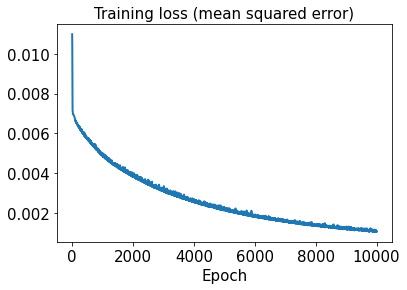

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

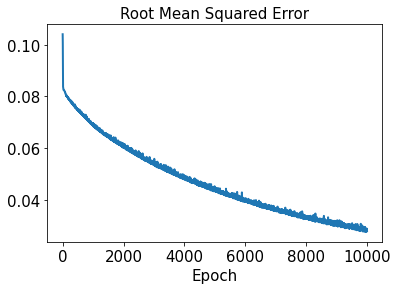

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 2.7777e-04 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0695617


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

1.2722347


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

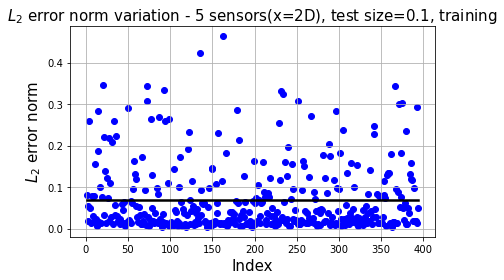

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=2D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

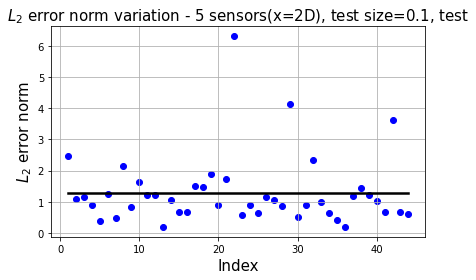

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 5 sensors(x=2D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

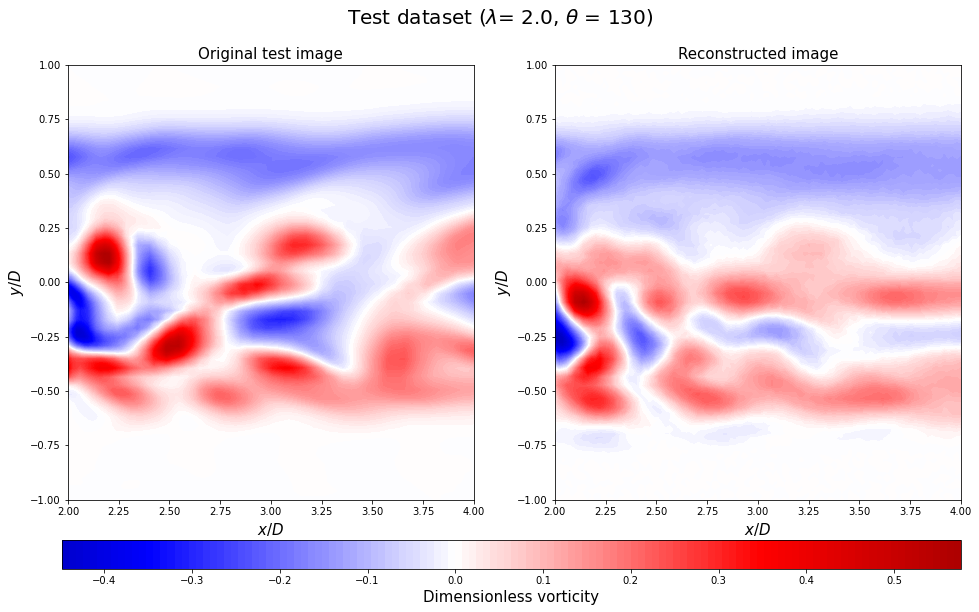

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

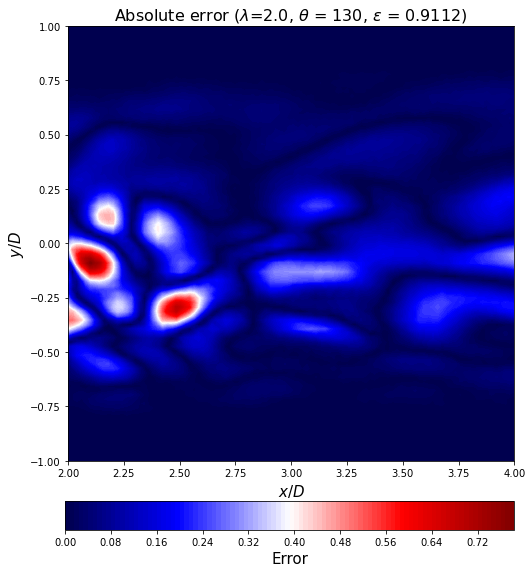

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()